<a href="https://colab.research.google.com/github/GabrielChuchuca/SIMULACION/blob/main/DeberSimulacionVacunacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El proceso de vacunacion es el siguiente.
* La persona llega 20 minutos antes de la hora de vacunacion
* Ingresa a la cola/fila a que toque su turno
- Tenemos un proceso de control en donde se toma los signos vitales y se valida que este dentro del padron (2-5 minutos)
- Se procede al traslado a la cama/silla de vacunacion y se inyecta la dosis de la vacuna este proceso tarde entre (5-10 minutos).
- Finalmente llevados a la salida entre (1-3 minutos).

Finalmente generar las siguientes metricas/graficas:
- Tiempo de espera promedio para cada persona.
- Tiempo promedio total que requiere un paciente para ser vacunado.
- Cuantos pacientes se atendieron.
- Cuantos pacientes se quedaron sin atende

In [6]:
import simpy
import random
import matplotlib.pyplot as plt

# Maximo de vehiculos que puede recibir el negocio
MAX_VACUNAS = 57
# Total de numero de mesas para vacunacion
NUM_MESAS = 3
PACIENTES = 400
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 20 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 480 #Minutos = 8 horas
INTERVALO = 10

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}
#Diccionario para el numero de pacientes que han sido atendidos
p_vacunado =[]
#Diccionario para el numero de pacientes que no han sido atendidos
p_no_vacunado = []

In [7]:
class Centro(object):
    def __init__(self, environment, num_mesas, nombre):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre

    #Proceso de control, para toma de signos vitales y valida estar dentro del padron
    def control(self, paciente):
        t_con = random.randint(2,5) #Tenemos un proceso de control en donde se toma los signos vitales y se valida que este dentro del padron (2-5 minutos)
        yield self.env.timeout(t_con)
            
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def vacunacion(self, paciente):
        t_vacunacion = random.randint(5,10) #Se procede al traslado a la cama/silla de vacunacion y se inyecta la dosis de la vacuna este proceso tarde entre (5-10 minutos).
        print("Tiempo tomado: ",t_vacunacion," para paciente: ",paciente)
        yield self.env.timeout(t_vacunacion)
        
        k = int(paciente.strip('Paciente-'))
        print("Paciente ",k)
        if k in tiempo_vacunacion:
            tiempo_vacunacion[k]=tiempo_vacunacion[k]+1
        else:
            tiempo_vacunacion[k]=t_vacunacion
            
    #Traslado para la salida del paciente
    def salida(self,paciente):
        t_salida = random.randint(1,3) #Finalmente llevados a la salida entre (1-3 minutos).
        yield self.env.timeout(t_salida)


In [8]:
def llegada(env, nombre, centro):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with centro.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del paciente
        yield env.process(centro.control(nombre))
        
        estado = random.randint(1,2)
        print("Sintomas: ",estado)
        if estado == 1:            
            p_no_vacunado.append(nombre)
        else:
            # Indicamos que paciente ingresa a la mesa de vacunacion
            print('Ingresa el paciente a las %s a la hora %.2f.' % (nombre, env.now))
            
            # Se realiza la vacunacion
            yield env.process(centro.vacunacion(nombre))
            # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
            print('Paciente [%s] vacunado a las %.2f.' % (nombre, env.now))
            p_vacunado.append(nombre)
            
        yield env.process(centro.salida(nombre))
        print('Paciente [%s] trasladado a la salida a las %.2f.' %(nombre,env.now))

In [9]:
def ejecucion(env, num_mesas, pacientes, intervalo):
    centro = Centro(env,num_mesas,"Coliseo UPS")
    for i in range(pacientes):
        env.process(llegada(env,'Paciente-%d'%(i+1), centro))
    while True:
        yield env.timeout(random.randint(intervalo-10,intervalo+10))
        i+=1
        env.process(llegada(env,'Paciente-%d'%(i+1), centro))

In [10]:
# Creamos el entorno de simulacion
env=simpy.Environment()
print("pacientes ", PACIENTES)
env.process(ejecucion(env, NUM_MESAS, PACIENTES, INTERVALO))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

pacientes  400
Llega el paciente: Paciente-1 a la hora 0.00.
Llega el paciente: Paciente-2 a la hora 0.00.
Llega el paciente: Paciente-3 a la hora 0.00.
Llega el paciente: Paciente-4 a la hora 0.00.
Llega el paciente: Paciente-5 a la hora 0.00.
Llega el paciente: Paciente-6 a la hora 0.00.
Llega el paciente: Paciente-7 a la hora 0.00.
Llega el paciente: Paciente-8 a la hora 0.00.
Llega el paciente: Paciente-9 a la hora 0.00.
Llega el paciente: Paciente-10 a la hora 0.00.
Llega el paciente: Paciente-11 a la hora 0.00.
Llega el paciente: Paciente-12 a la hora 0.00.
Llega el paciente: Paciente-13 a la hora 0.00.
Llega el paciente: Paciente-14 a la hora 0.00.
Llega el paciente: Paciente-15 a la hora 0.00.
Llega el paciente: Paciente-16 a la hora 0.00.
Llega el paciente: Paciente-17 a la hora 0.00.
Llega el paciente: Paciente-18 a la hora 0.00.
Llega el paciente: Paciente-19 a la hora 0.00.
Llega el paciente: Paciente-20 a la hora 0.00.
Llega el paciente: Paciente-21 a la hora 0.00.
Llega e

[(1, 10), (2, 10), (4, 9), (5, 6), (8, 8), (9, 10), (10, 8), (11, 5), (13, 6), (15, 5), (16, 8), (17, 7), (18, 9), (20, 9), (21, 7), (22, 10), (24, 6), (25, 6), (30, 9), (33, 7), (35, 9), (36, 8), (37, 10), (40, 9), (41, 8), (42, 9), (45, 10), (46, 8), (52, 5), (53, 5), (54, 9), (57, 5), (58, 10), (59, 9), (60, 5), (61, 5), (63, 10), (64, 9), (65, 10), (68, 8), (69, 7), (71, 10), (73, 7), (74, 8), (75, 9), (77, 6), (79, 6), (80, 8), (83, 10), (84, 10), (85, 8), (86, 10), (87, 8), (88, 5), (90, 9), (96, 10), (97, 9), (98, 9), (99, 9), (101, 8), (103, 5), (104, 10), (106, 10), (108, 10), (109, 5), (112, 7), (119, 6), (121, 10), (123, 5), (125, 8), (128, 7), (129, 9), (130, 5), (132, 10), (134, 7), (137, 6), (138, 6), (140, 5), (142, 5), (143, 10), (145, 7)]


Text(0.5, 0, 'Tiempo tomado')

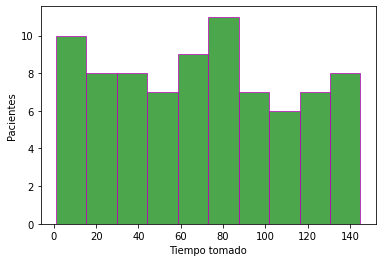

In [12]:
# SE CREA LA GRAFICA
datos = sorted(tiempo_vacunacion.items())
print(datos)
x, y = zip(*datos)
result = plt.hist(x,color='green',edgecolor='m',alpha=0.7)
plt.ylabel("Pacientes")
plt.xlabel("Tiempo tomado")

In [ ]:
suma = 0
for val in tuple(tiempo_vacunacion.values()):
    suma = suma+val
print("Promedio de tiempo vacunacion",suma/len(tiempo_vacunacion))

Promedio de tiempo vacunacion 7.265822784810126


In [ ]:
print("Total de pacientes que llegaron ",PACIENTES)
print("Vacunados ", len(p_vacunado))
print("No vacunados ", len(p_no_vacunado))
n_atendidos = PACIENTES-(len(p_vacunado)+len(p_no_vacunado))
print("Pacientes no atendidos",n_atendidos)

Total de pacientes que llegaron  400
Vacunados  79
No vacunados  76
Pacientes no atendidos 245
